In [1]:
import pandas as pd


In [2]:
accidents = pd.read_csv('C:\imen\dps_challenge\monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')


In [3]:
accidents

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [4]:
accidents = accidents.iloc[:,[0,1,2,3,4]]

In [5]:
accidents = accidents.rename(columns= {'MONATSZAHL':'Category','AUSPRAEGUNG':'Accident-type','JAHR':'Year','MONAT':'Month','WERT':'Value'})


In [6]:
accidents

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [14]:
accidents= accidents[accidents['Year']<=2020]

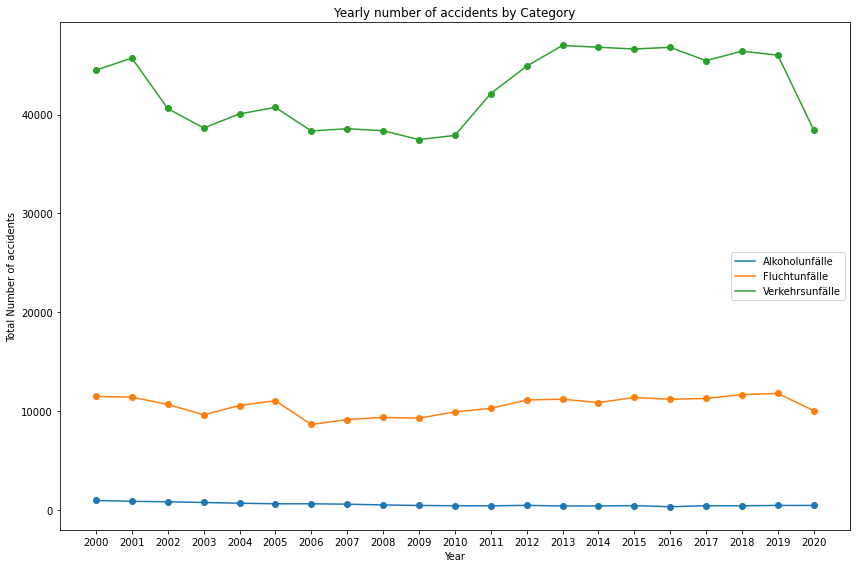

In [19]:
import matplotlib.pyplot as plt
accidents_copy = accidents[accidents['Accident-type']=='insgesamt']
# Group by 'categorie', 'annee' (year), and sum the 'nombre_achat'
category_yearly = accidents_copy.groupby(['Category', accidents_copy['Year']])['Value'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over unique categories and plot the time series for each
for category in category_yearly['Category'].unique():
    category_data = category_yearly[category_yearly['Category'] == category]
    plt.plot(category_data['Year'], category_data['Value'], label=f'{category}')

    # Ajouter des points à chaque donnée pour chaque catégorie
    plt.scatter(category_data['Year'], category_data['Value'])

plt.xlabel('Year')
plt.ylabel('Total Number of accidents')
plt.title('Yearly number of accidents by Category')
plt.legend()
plt.tight_layout()

# Définir les étiquettes de l'axe des abscisses
plt.xticks(category_yearly['Year'].unique())  # Utilisez les valeurs uniques des années

# Show the plot
plt.show()

